In [4]:
#Importing libraries and fetching dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_train=pd.read_csv('bigdatamart_Train.csv')
df_test=pd.read_csv('bigdatamart_Test.csv')
df_sales=pd.concat([df_train,df_test],ignore_index=True)
df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [6]:
df_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
#Checking datatypes of each column
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#checking for null values
df_sales.isnull().sum()
#There are null values present in three columns which must be imputed.

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
#Correlation matrix
df_sales.corr()
#We observe that all the variables have very less correlation between each other ,only 'Item_MRP' and 'Item_Outlet_Sales' shows significant correlation of 0.56

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [10]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


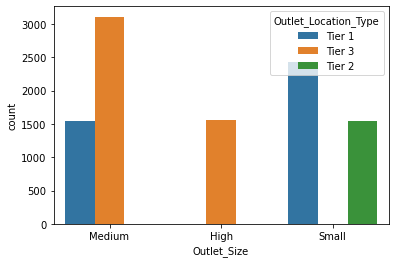

In [11]:
#Graphical Representation 
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=df_sales)
plt.show()

In [12]:
#Check for value counts
for i in df_sales.columns:
    if df_sales[i].dtype=="object":
        print(df_sales[i].value_counts())
        print()

FDW12    10
FDJ57    10
FDH27    10
FDX47    10
FDD45    10
         ..
NCW54     7
FDH58     7
FDM52     7
NCL42     7
FDS22     7
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [13]:
#Basically there are two types of item fat content are present i.e Low Fat and Regular.So we have to replace all other in these two contents.
#Replacing LF and low fat with Low Fat and reg to Regular
df_sales["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
df_sales["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
df_sales["Item_Fat_Content"].replace("reg","Regular",inplace=True)

#Again checking 'Item_Fat_Contents' value counts
df_sales["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [14]:
#For treating NaN Values we have to impute the 'Item_Weight' by mean of 'Item_Weight' groupped by 'Item_Identifier' 
weight=df_sales.groupby(["Item_Identifier"]).agg({"Item_Weight":"mean"})
weight
for index in weight.index:
    null_condition=df_sales.loc[df_sales["Item_Identifier"]==index,["Item_Weight"]].isnull()
    for index_2 in null_condition.index:
        if null_condition.loc[index_2][0]==True:
            df_sales.loc[index_2,["Item_Weight"]]=weight.loc[index][0]
#Similarly we can do for outlet size

In [15]:
#Value counts of outlet sixe
df_sales["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [16]:
#Imputing the 'Outlet_Size' by mode of 'Outlet_Size' groupped  by 'Outlet_Type'
size=df_sales.groupby(["Outlet_Type"]).agg({"Outlet_Size":lambda x: x.value_counts().index[0]})
size
for index in size.index:
    null_condition=df_sales.loc[df_sales["Outlet_Type"]==index,["Outlet_Size"]].isnull()
    for index_2 in null_condition.index:
        if null_condition.loc[index_2][0]==True:
            df_sales.loc[index_2,["Outlet_Size"]]=size.loc[index][0]


In [17]:
#Checking for null values 
df_sales.isnull().sum()
#After imputation Item_Weight and Outlet_Size has no null values.

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [18]:
#We observe that item visibility can't be 0 so we have to replace it by mean of 'Item_Visibility' groupped by 'Item_Identifier'
visibility=df_sales.groupby(["Item_Identifier"]).agg({"Item_Visibility":"mean"})
visibility
for index in visibility.index:
    visibility0=df_sales.loc[(df_sales["Item_Identifier"]==index)&(df_sales["Item_Visibility"]==0)]
    if len(visibility0.index)>0:
        for index_2 in visibility0.index:
            df_sales.loc[index_2,["Item_Visibility"]]=visibility.loc[index][0]

df_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [19]:
#We use dummies to convert non numeric columns to numeric so that ML model can easily process it
df_mart=pd.get_dummies(df_sales,columns=["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size","Outlet_Type"])
df_mart

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.017834,182.0950,OUT010,1998,732.3800,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,1987,994.7052,1,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,1997,NaN,0,1,0,...,1,0,0,0,0,1,0,1,0,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,2009,NaN,0,1,0,...,0,0,1,0,1,0,0,0,1,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,2002,NaN,1,0,0,...,0,1,0,0,0,1,0,1,0,0
14202,FDJ26,15.30,0.088380,214.6218,OUT017,2007,NaN,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [20]:
#Checking the skewness
check=["Item_Weight","Item_MRP","Item_Visibility","Item_Weight","Outlet_Establishment_Year"]
for i in df_mart.skew().index:
    if i in check:
        print("Skewness of column {} : {}".format(i,df_mart.skew().loc[i]))

Skewness of column Item_Weight : 0.10041690891741958
Skewness of column Item_Visibility : 1.2574052519888312
Skewness of column Item_MRP : 0.13072836040225863
Skewness of column Outlet_Establishment_Year : -0.39646519008637443


In [21]:
#Remove the skewness
df_mart.skew()
for i in df_mart.skew().index:
    if i in check:
        if df_mart.skew().loc[i]>0.5:
            df_mart[i]=np.sqrt(df_mart[i])
        if df_mart.skew().loc[i]<-0.5:
            df_mart[i]=np.cbrt(df_mart[i])

In [22]:
#Checking the skewness again
for i in df_mart.skew().index:
    if i in check:
        print("Skewness of column {} : {}".format(i,df_mart.skew().loc[i]))

Skewness of column Item_Weight : 0.10041690891741958
Skewness of column Item_Visibility : 0.41413332304805806
Skewness of column Item_MRP : 0.13072836040225863
Skewness of column Outlet_Establishment_Year : -0.39646519008637443


In [23]:
#Based on observation "Item_identifier" and "Outlet_identifier" can be dropped as it is not so important variable
df_mart.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)
df_mart

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,1999,3735.1380,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,5.92,0.138846,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,17.50,0.129461,141.6180,1999,2097.2700,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,19.20,0.133545,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.098893,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.116174,141.3154,1997,NaN,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
14200,7.60,0.378141,169.1448,2009,NaN,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
14201,10.00,0.271162,118.7440,2002,NaN,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
14202,15.30,0.297288,214.6218,2007,NaN,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [24]:
#Marking testing and training data where outlet sales values is NaN

df_mart["Source"]="Source"

for i in range(len(df_mart["Item_Outlet_Sales"])):
    if pd.isnull(df_mart["Item_Outlet_Sales"][i]):
        df_mart["Source"][i]="Test"
    else : 
        df_mart["Source"][i]="Train"
        
df_mart

<ipython-input-24-376ae85147c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mart["Source"][i]="Train"
<ipython-input-24-376ae85147c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mart["Source"][i]="Test"


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Source
0,9.30,0.126678,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,Train
1,5.92,0.138846,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,Train
2,17.50,0.129461,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,Train
3,19.20,0.133545,182.0950,1998,732.3800,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,Train
4,8.93,0.098893,53.8614,1987,994.7052,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.116174,141.3154,1997,NaN,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,Test
14200,7.60,0.378141,169.1448,2009,NaN,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,Test
14201,10.00,0.271162,118.7440,2002,NaN,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,Test
14202,15.30,0.297288,214.6218,2007,NaN,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,Test


In [25]:
#Separating the train and test
df_train=df_mart.loc[df_mart["Source"]=="Train"]
df_test=df_mart.loc[df_mart["Source"]=="Test"]

In [26]:
#Drop "Item_Outlet_Sales" as it is a output variable which has to be predicted.
df_test.drop(columns=["Item_Outlet_Sales", "Source"],inplace=True)

C:\DataScience\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
#Separating input and output variable
df_x=df_train.drop(columns=["Item_Outlet_Sales", "Source"])
y=df_train[["Item_Outlet_Sales"]]

In [28]:
#Bring every column to common scale by using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [29]:
#defining a function to find random state which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [30]:
#defining a model evaluation function using cross_val_score
from sklearn.model_selection import cross_val_score
def model_eval(model,x,y):
    c_scr=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scr.mean())
    print("Standard deviation in r2 score for regressor: ",c_scr.std())
    print(c_scr)

In [31]:
#Using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=23)
x_pca=pca.fit_transform(x)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))

variance :0.9650240506458517


In [32]:
#Using Decision tree
from sklearn.tree import DecisionTreeRegressor
import numpy  as np
dtr=DecisionTreeRegressor()
r_state= maxr2_score(dtr,x_pca,y)

#max r2 score corresponding to  77  is  0.2545108744845749

r2 score corresponding to  42  is  0.1518849599863703
r2 score corresponding to  43  is  0.1801756304846115
r2 score corresponding to  44  is  0.13224392237298532
r2 score corresponding to  45  is  0.10070955980775431
r2 score corresponding to  46  is  0.057830827186719946
r2 score corresponding to  47  is  0.16046289263471425
r2 score corresponding to  48  is  0.16468157812987305
r2 score corresponding to  49  is  0.23518996005657244
r2 score corresponding to  50  is  0.16679614829211853
r2 score corresponding to  51  is  0.20174920108179284
r2 score corresponding to  52  is  0.12498917463898096
r2 score corresponding to  53  is  0.11667971055746174
r2 score corresponding to  54  is  0.20183948065539326
r2 score corresponding to  55  is  0.1649041336543554
r2 score corresponding to  56  is  0.15157290604289708
r2 score corresponding to  57  is  0.1949199693233108
r2 score corresponding to  58  is  0.15436593598414683
r2 score corresponding to  59  is  0.19891598388367915
r2 score corr

In [33]:
#Using random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

#'n_estimators': 500

C:\DataScience\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\DataScience\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\DataScience\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\DataScience\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

{'n_estimators': 500}

In [34]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x_pca,y)

#max r2 score corresponding to  89  is  0.5796221838753737

<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  42  is  0.5501696715538275


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  43  is  0.5573661597692319


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  44  is  0.5471384904804778


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  45  is  0.5482531857592517


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  46  is  0.48889569474105055


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  47  is  0.5402342880333104


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  48  is  0.5546588795931684


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  49  is  0.5585154642865268


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  50  is  0.5400434690442213


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  51  is  0.5361314048450135


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  52  is  0.5277762522637435


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  53  is  0.5175358551708474


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  54  is  0.5632049698391042


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  55  is  0.5552227251449156


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  56  is  0.5277632767182956


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  57  is  0.5491170931033017


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  58  is  0.5430410129035034


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  59  is  0.5383773286875052


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  60  is  0.5646945927586685


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  61  is  0.5373973002439851


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  62  is  0.5563610763480988


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  63  is  0.5545378949014648


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  64  is  0.536163600796134


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  65  is  0.5712568141442742


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  66  is  0.5390292894821589


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  67  is  0.5517092301356114


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  68  is  0.5278945133853516


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  69  is  0.5619565348474842


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  70  is  0.5590482854133895


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  71  is  0.5550138154332889


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  72  is  0.5733119758368799


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  73  is  0.5240422350018127


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  74  is  0.5316596401275191


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  75  is  0.5582222134115173


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  76  is  0.5617064863343957


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  77  is  0.5546669171473095


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  78  is  0.5186087761653253


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  79  is  0.5513209653353924


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  80  is  0.5636162029794184


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  81  is  0.5526585511207261


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  82  is  0.5558917431524244


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  83  is  0.5187646010053496


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  84  is  0.578497525725873


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  85  is  0.5448524698882972


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  86  is  0.5469890680495175


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  87  is  0.5106688012565802


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  88  is  0.5277184936077404


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  89  is  0.5796221838753737


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  90  is  0.5330885550868016


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  91  is  0.5094814581434508


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  92  is  0.5647552292599289


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  93  is  0.5407753500936375


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  94  is  0.5464960319377372


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  95  is  0.5479043302608988


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  96  is  0.5555609491240329


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  97  is  0.5485624773191353


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  98  is  0.5423459556130147


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  99  is  0.5729857281362561


<ipython-input-29-7eb9efbb9607>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x_train,y_train)


r2 score corresponding to  100  is  0.5385475830717559
max r2 score corresponding to  89  is  0.5796221838753737


In [35]:
#Using KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

#found n neighbours is 8

{'n_neighbors': 8}

In [36]:
knr=KNeighborsRegressor(n_neighbors=8)
r_state=maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.489454225589364
r2 score corresponding to  43  is  0.5166053142325513
r2 score corresponding to  44  is  0.5022027346818867
r2 score corresponding to  45  is  0.48998589520622315
r2 score corresponding to  46  is  0.45388215355079
r2 score corresponding to  47  is  0.46146166825750823
r2 score corresponding to  48  is  0.4942677625349723
r2 score corresponding to  49  is  0.5033682144422407
r2 score corresponding to  50  is  0.49296781054187877
r2 score corresponding to  51  is  0.48070638415615075
r2 score corresponding to  52  is  0.48728988835229925
r2 score corresponding to  53  is  0.4672767238816562
r2 score corresponding to  54  is  0.5040555665960216
r2 score corresponding to  55  is  0.5009489590222451
r2 score corresponding to  56  is  0.47071619134858766
r2 score corresponding to  57  is  0.46831631813666363
r2 score corresponding to  58  is  0.4807055859643793
r2 score corresponding to  59  is  0.4819017073625175
r2 score corresponding t

In [37]:
#Using SVM regressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

#c values is 10 , kernel chosen is linear

{'C': 10, 'kernel': 'linear'}

In [38]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x_pca,y)

#max r2 score corresponding to  76  is  0.5564367948823679

r2 score corresponding to  42  is  0.5544076555016821
r2 score corresponding to  43  is  0.5402339546807273
r2 score corresponding to  44  is  0.5445061756094572
r2 score corresponding to  45  is  0.5368367896179611
r2 score corresponding to  46  is  0.5306908933061171
r2 score corresponding to  47  is  0.5294634875349254
r2 score corresponding to  48  is  0.5234302627650249
r2 score corresponding to  49  is  0.5366041006150875
r2 score corresponding to  50  is  0.5355938395484798
r2 score corresponding to  51  is  0.5278766018207752
r2 score corresponding to  52  is  0.5450694475042719
r2 score corresponding to  53  is  0.5302519888063064
r2 score corresponding to  54  is  0.5328399202268688
r2 score corresponding to  55  is  0.5291423778550043
r2 score corresponding to  56  is  0.5107064689052361
r2 score corresponding to  57  is  0.517371849588751
r2 score corresponding to  58  is  0.5413210466401172
r2 score corresponding to  59  is  0.5332999529454099
r2 score corresponding to  60

In [39]:
print("DECISION TREE REGRESSOR\n\n")
model_eval(dtr,x_pca,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  0.1318369043007982
Standard deviation in r2 score for regressor:  0.04870490574806915
[0.18567168 0.0542076  0.11140221 0.12619671 0.18170632]


In [40]:
print("RANDOM FOREST REGRESSOR\n\n")
model_eval(rfr,x_pca,y)

RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.5402521342309708
Standard deviation in r2 score for regressor:  0.026473246856285052
[0.57040714 0.50792844 0.50900715 0.55417221 0.55974574]


In [41]:
print("KNN REGRESSOR\n\n")
model_eval(knr,x_pca,y)

KNN REGRESSOR


Mean r2 score for regressor:  0.4858862863591325
Standard deviation in r2 score for regressor:  0.019126291130727724
[0.49578301 0.45699143 0.48142584 0.4802782  0.51495295]


In [42]:
print("SVM REGRESSOR\n\n")
model_eval(svr,x_pca,y)

SVM REGRESSOR


Mean r2 score for regressor:  0.5345553458549619
Standard deviation in r2 score for regressor:  0.004607903843670245
[0.54214011 0.53039107 0.52922328 0.53623084 0.53479143]


In [43]:
#Based on above r2 scores Random forest and SVM models are performing better than others
#Using SVM
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 76,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [44]:
#LRMSE and r2_score for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1126.2102852276653
r2_score is:  0.5564367948823679


In [45]:
#Using random forest 
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 89,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [46]:
#RMSE and r2_score for random forest model
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1092.9968258470883
r2_score is:  0.5794069486660232


In [47]:
#Transforming df_test according to PCA
x_pca_test=pca.transform(df_test)

In [48]:
sales_pred=rfr.predict(x_pca_test)

In [49]:
#Dataframe for price prediction
sales_pred=pd.DataFrame(sales_pred,columns=["Item_Outlet_sales"])

In [50]:
#Saving prediction to csv file
sales_pred.to_csv("Item_outlet_sales_Predictions.csv",index=False)